## What Causes Heavy Traffic in I-94?

This is a visualization project that aims to use various charts in describing traffic indicators on I-94. The main goal of this project is to determine what are some of the indicators of traffic in the Interstate highway given the data collected.

### Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### Inspecting the dataframe

There are no null values in the dataset.

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


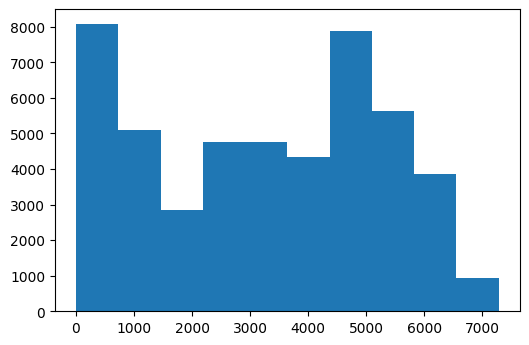

In [3]:
plt.hist(traffic['traffic_volume'])
plt.show()

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Comparing traffic volume in daytimes and nighttimes

Creating a datetime object

In [5]:
traffic['datetime'] = pd.to_datetime(traffic['date_time'])
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,datetime
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02 09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02 10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02 11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02 12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02 13:00:00
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,2018-09-30 19:00:00
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018-09-30 20:00:00
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018-09-30 21:00:00
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018-09-30 22:00:00


Isolate the daytimes into a separate dataframe (7AM-6PM)

In [6]:
day = traffic[traffic['datetime'].dt.hour.between(7, 18)]
day = day.reset_index()
day

,index,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,datetime
0,0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02 09:00:00
1,1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02 10:00:00
2,2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02 11:00:00
3,3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02 12:00:00
4,4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
23872,48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,2018-09-30 15:00:00
23873,48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,2018-09-30 15:00:00
23874,48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,2018-09-30 16:00:00
23875,48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,2018-09-30 17:00:00


Isolate the nighttimes into a separate dataframe (7PM-6AM)

In [7]:
night = traffic[~traffic['datetime'].dt.hour.between(7, 19)]
night = night.reset_index()
night

,index,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,datetime
0,11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,2012-10-02 20:00:00
1,12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,2012-10-02 21:00:00
2,13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,2012-10-02 22:00:00
3,14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,2012-10-02 23:00:00
4,15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506,2012-10-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
22361,48184,None,280.17,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 06:00:00,802,2018-09-30 06:00:00
22362,48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,2018-09-30 20:00:00
22363,48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,2018-09-30 21:00:00
22364,48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,2018-09-30 22:00:00


Traffic volumes are plotted per time period (daytime and nighttime). Based on the results below, the daytime traffic volume is found to be more normally distributed compared to nighttime traffic volume. 

This means that during the time of the day, the peak traffic volume happens at around 50% of the total traffic whereas in the night time, majority of the traffic occurs less frequently.

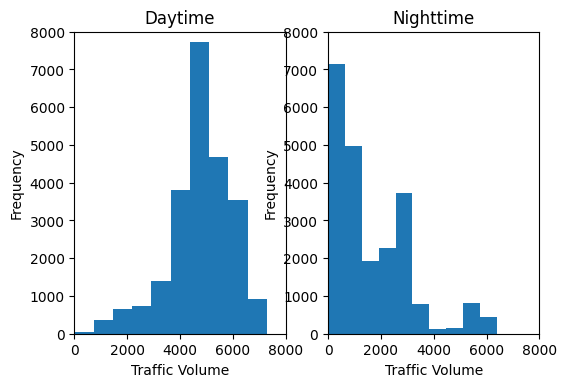

In [8]:
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.show()

The statistics below further supports the claim of a normal distribution since the most of the traffic occurs when traffic volume is around 50% of the total traffic.

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

On the other hand, at night, the traffic seems to be significantly lower at the 25th, 50th, and 75th percentiles compared to the daytime data. This is, despite having a maximum traffic volume of around 6,400, which skewed the whole data.

In [10]:
night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

Since the goal is to find indicators of heavy traffic, we'll only consider daytime data given the presence of heavy traffic volumes in various times of the day.

### Time Indicators

We'll start by looking into how traffic volume has changed per month:

In [12]:
day['month'] = day['datetime'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Based on the line plot below, traffic volume seems to increase during the months of March and August whereas decreasing traffic volumes were observed in June and October (where traffic volume drastically declined).

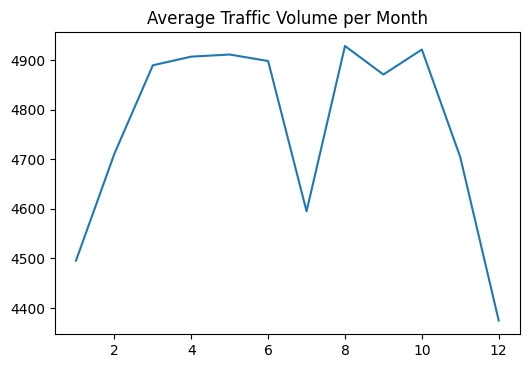

In [18]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.title('Average Traffic Volume per Month')
plt.show()

Next, we'll be looking into trends of traffic volume per day of the week:

In [20]:
day['dayofweek'] = day['datetime'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Based on the line plot below, business days tend to have higher traffic volumes compared to weekends. In business days, specifically, traffic volume tends to increase as the week approaches Friday and then drops significantly in the following day since it is the weekend.

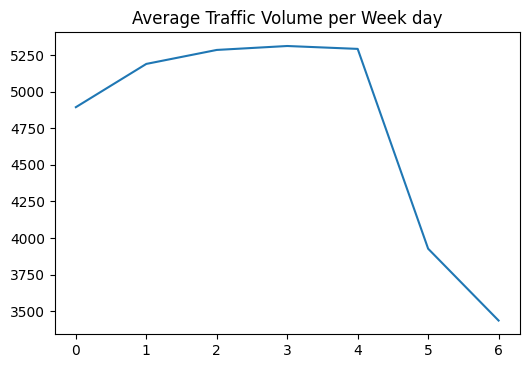

In [21]:
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.title('Average Traffic Volume per Week day')
plt.show()

Lastly, we'll be investigating traffic volumes per time of the day. Since traffic volumes tend to differ per day of the week (business day vs weekends), we'll be splitting these two datasets and create time plots separately.

In [22]:
day['hour'] = day['datetime'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Looking into both plots, we can see that the average traffic volumes tend to be significantly higher in business days compared to weekdays across various time periods.

During the weekends, traffic volume peaks at around 7-8AM and 4PM which indicates the rush hours in those days. On the other hand, traffic volume usually peaks from lunchtime onwards, which indicates people going out at leisure times.

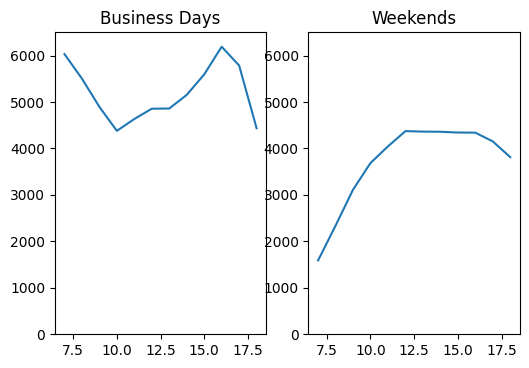

In [24]:
plt.subplot(1, 2, 1)
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'])
plt.title('Business Days')

plt.ylim([0, 6500])
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.ylim([0, 6500])
plt.show()

Based on the plots above, we conclude that:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

### Weather Indicators

Next, we'll be looking into weather as a possible indicator of heavy traffic. We'll be using correlation tests for each of the numerical weather columns against traffic volume to see if there are any meaningful insights.

In [32]:
day[['temp', 'rain_1h', 'snow_1h', 'clouds_all']].corrwith(day['traffic_volume'])

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
dtype: float64

Based on the correlations above, temperature seems to be most correlated against traffic volume. To visualize further, the scatterplot below shows the relationship between these factors.

Looking into the plot below, we can see that most of the points converge bet. 250 - 300 kelvin and that there is no evident trend of any relationship between temperature and traffic volume.

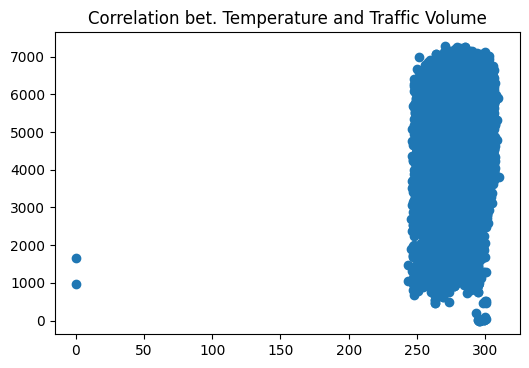

In [35]:
plt.scatter(day['temp'], day['traffic_volume'])
plt.title('Correlation bet. Temperature and Traffic Volume')
plt.show()

After removing the outliers (0 kelvin), we still see no evident relationship between temperature and traffic volume since no direction is visible. Given that this is the highest correlated weather indicator. we can say that there is no reliable weather indicator for heavy traffic.

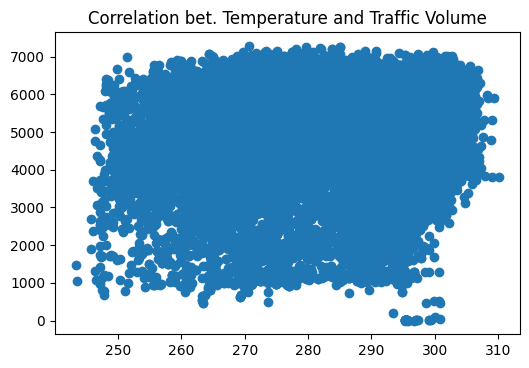

In [36]:
day_modif = day[day['temp'] > 200]

plt.scatter(day_modif['temp'], day_modif['traffic_volume'])
plt.title('Correlation bet. Temperature and Traffic Volume')
plt.show()

The last indicator that we'll be looking into are the categorical weather-related columns: weather_main and weather_description.

We'll be calculating the average traffic volume for each distinct value in each column to see any evident differences in each column. We'll start by aggregating the datasets first and calculating the mean of each group.

In [45]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

Afterwards, we'll be creating a horizontal bar chart for each of the columns associated.

For the first column (weather main), none of the indicators show a traffic volume exceeding 5,000 cars. Heavy traffic, based on the data below, is observed most when the weather is either cloudy or having a presence of drizzle.

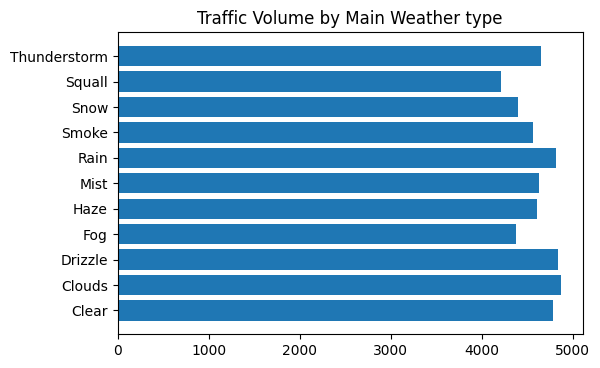

In [50]:
plt.barh(by_weather_main.index, width = by_weather_main['traffic_volume'])
plt.title('Traffic Volume by Main Weather type')
plt.show()

For the second column (weather description), two weather indicators show a traffic volume exceeding 5,000 cars; these are shower snow and the light rain and snow weather. This implies that heavy traffic may be caused by a combination of both rain and snowy weathers.

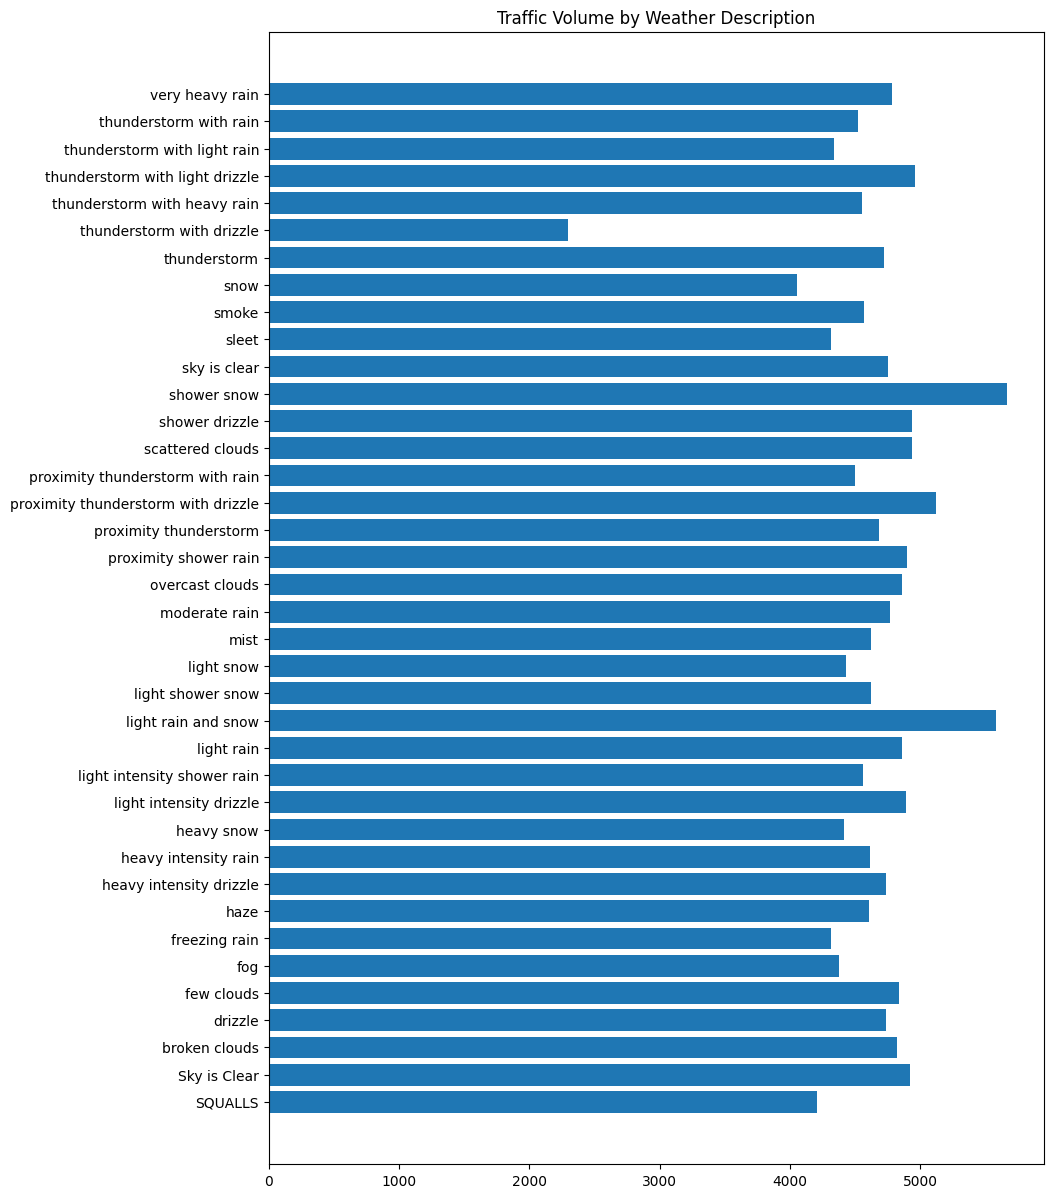

In [51]:
plt.figure(figsize=(10,15))
plt.barh(by_weather_description.index, width = by_weather_description['traffic_volume'])
plt.title('Traffic Volume by Weather Description')
plt.show()

### Conclusion

In this project, the main objetive is to determine if there are indicators of heavy traffic on the I-94 Interstate highway. We only included traffic during the daytime hours since majority of the heavy traffic is found within that period. Based on this data, we were able to derive two types of indicators:

Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle